<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-LH-1169213/blob/main/IBM_mod4_DataAnalysisIBM_A01169213.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Model Development
## Laura Elena Hernández Mata
## A01169213
### Semana 7

## MODEL DEVELOPMENT

Un modelo es una ecuación matemática que sirve para estimar información. Es importante que la data sea relevante para que el análisis sea significativo.

Los modelos que aprenderemos son:

*   Simple Linear Regression
*   Multiple Linear Regression
*   Polynomial Regression



## LINEAR & MULTIPLE LINEAR REGRESSION

**LINEAR REGRESSION:** Relación entre variable dependiente e independiente, y hacer predicciones. 

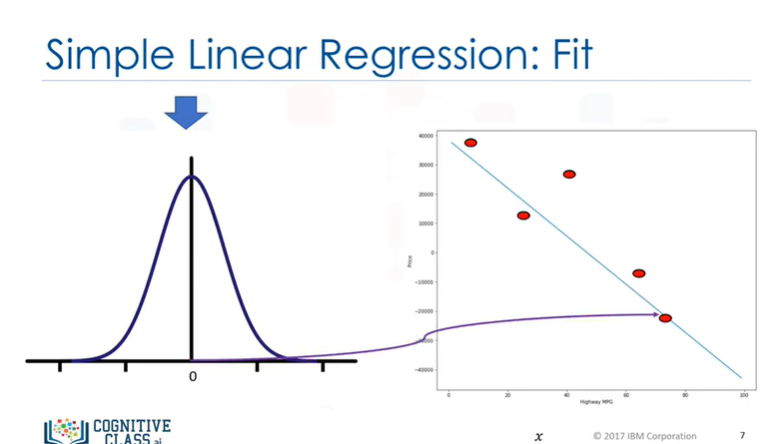

Y las estimaciones se hacen con y_hat:

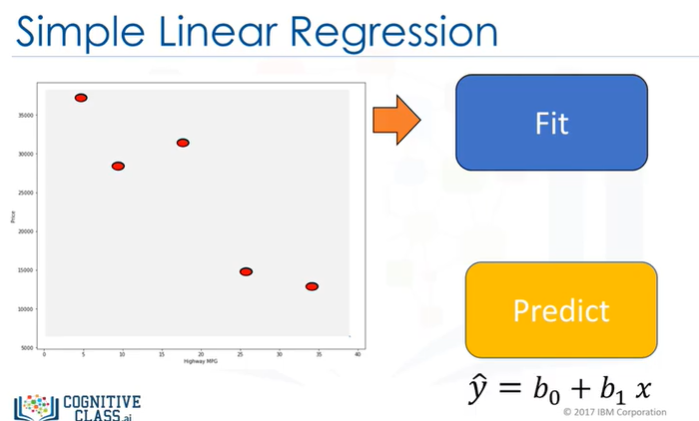

El modelo se corre con las siguientes líneas de código: 

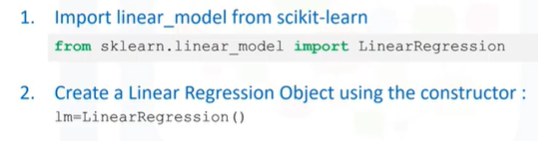

Es importante definir las variables, tal como se muestra a continuación:

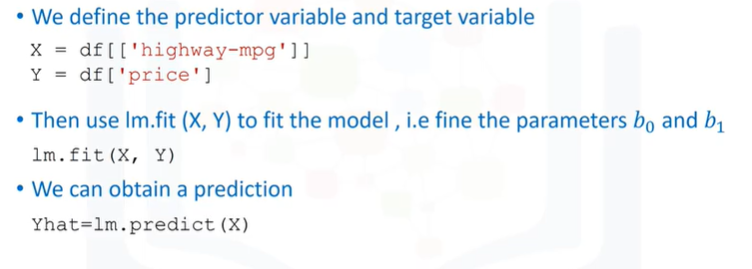

Y de esta manera, obtenemos los valores para predecir:

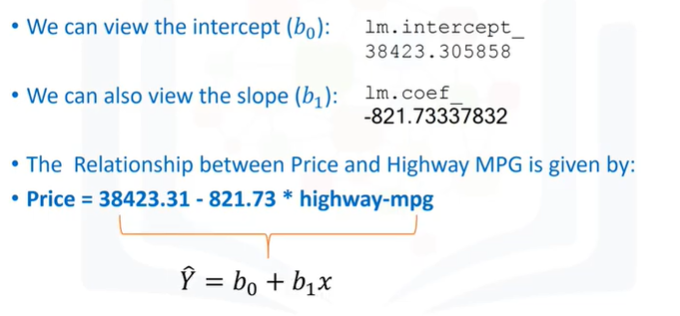

**REGRESIÓN MÚLTIPLE:** Es un modelo en el que hay mayor cantidad de variables involucaradas.

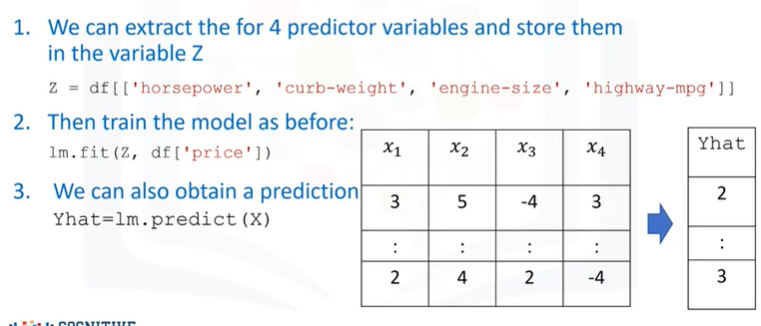

Y los valores se aprecian de la siguiente manera: 

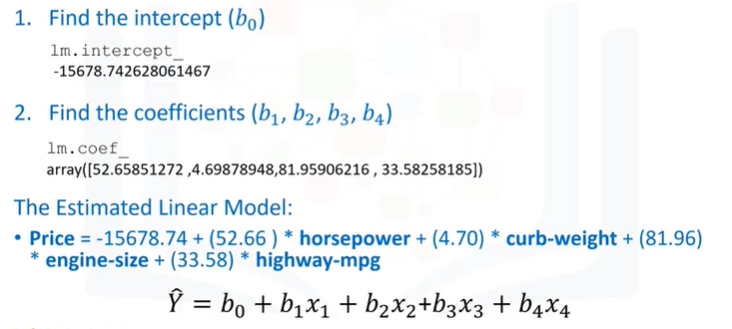

## EVALUACIÓN DEL MODELO

**VISUALIZATION**

Las gráficas ayudan a entender visualmente la información, tal com ose aprecia a continuación:

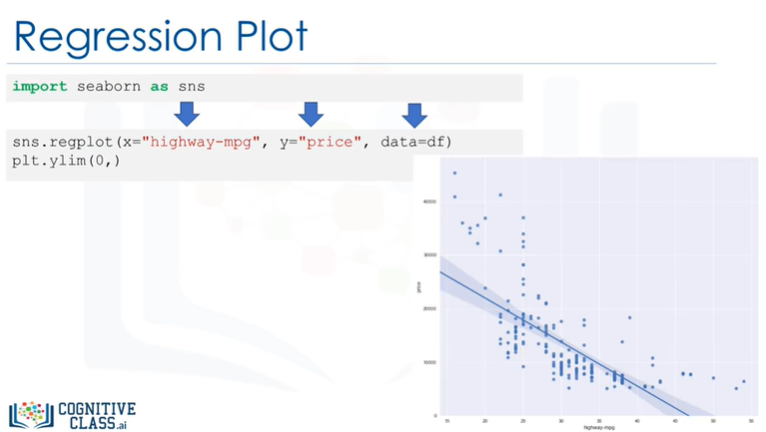

Para ver los residuos es necesario realizar lo siguiente:

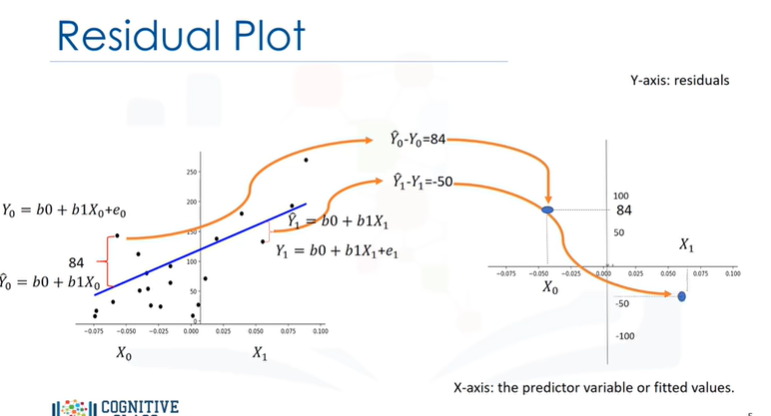

Acá se puede apreciar de otra forma:

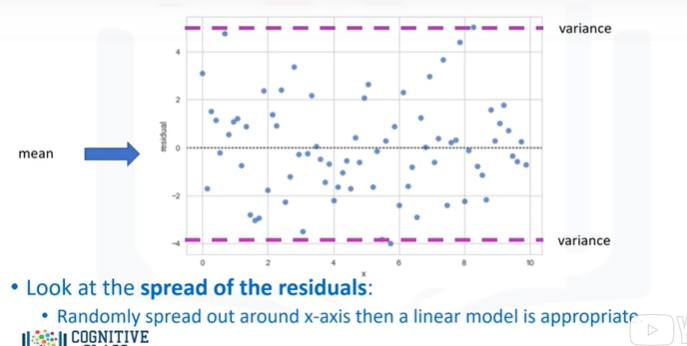

Otro ejemplo de gráfica de residuos es la siguiente, en la cual se puede apreciar que el modelo está mal, ya que a diferencia del anterior, hay una curvatura y ésta no debería de ocurrir.

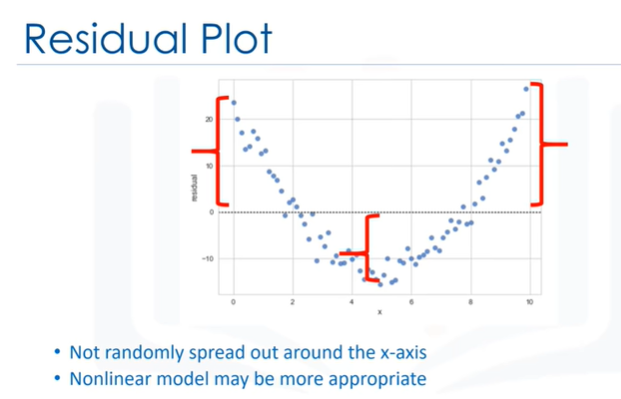

Para graficar los residuos se hace lo siguiente:

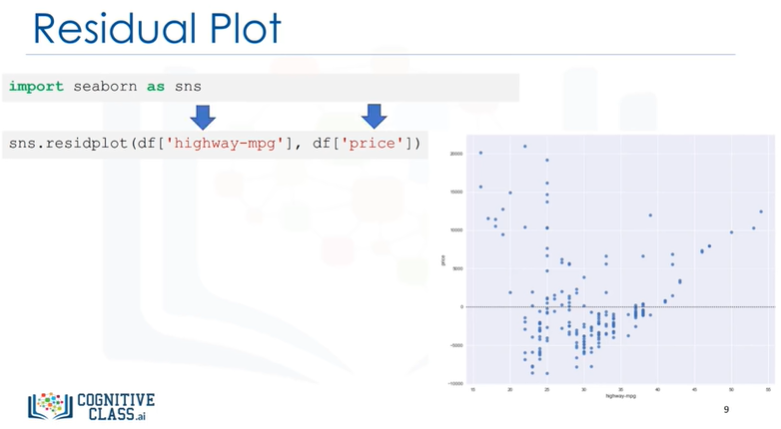

También existen las distribution plots, que se codifican de la siguiente forma: 

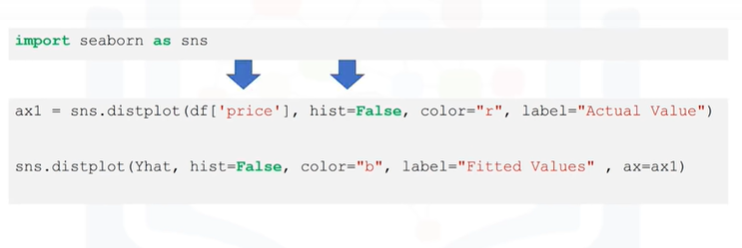

Diferencia entre análisis de regresión lineal (derecha) y regresión múltiple (izquierda)

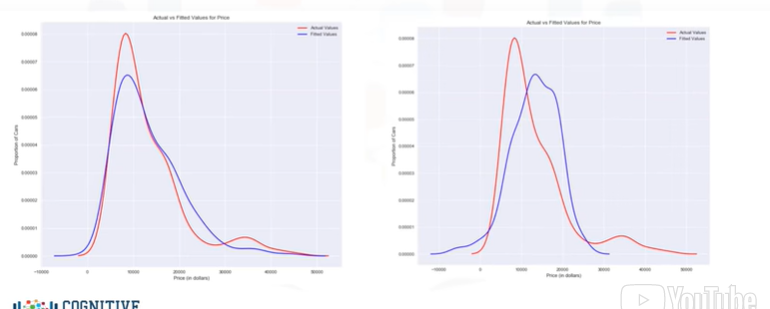

## POLYNOMIAL REGRESSION & PIPELINES

**POLYNOMIAL REGRESSION** Es últil para hacer regresiones de datos con curvatura, ya sean cuadrados, cúbicos, o de cualquier otro orden:

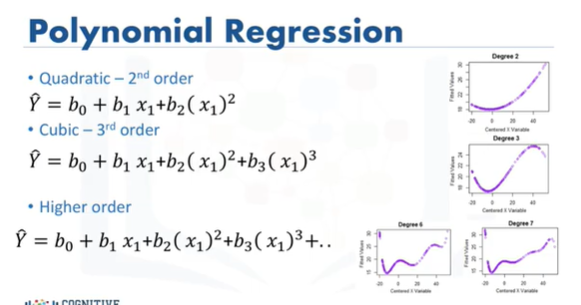

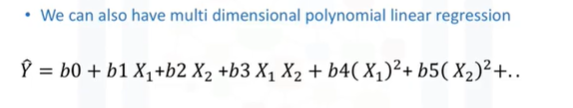

Para correr el código se hace lo siguiente:

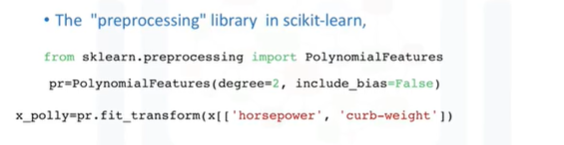

También se puede normalizar la información:

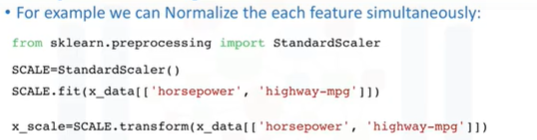

Para hacer una predicción se puede hacer un **PIPELINE** que es una serie de transformaciones secuenciales, en el cual el último paso es la predicción.

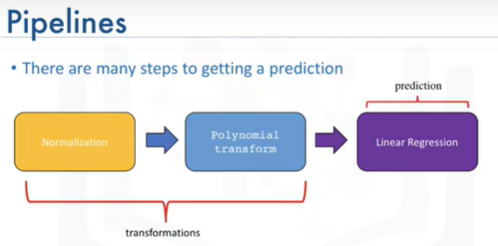

Se debe de entrenar el pipeline con los valores que se consideren pertinentes. 

## MEASURES FOR IN-SAMPLE EVALUATION

**EVALUACIÓN DEL MODELO DE MANERA NUMÉRICA**

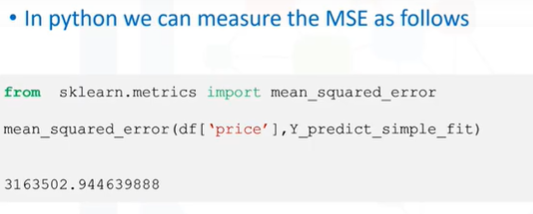

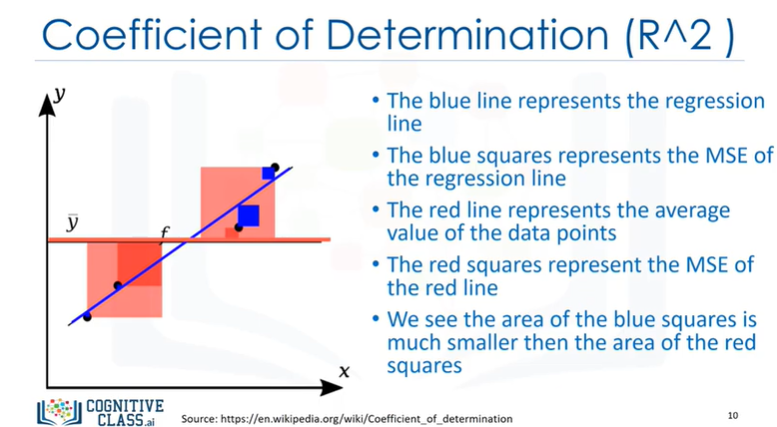

Your R^2 value is usually between 0 and 1, if your R^2 is negative it can be due to overfitting

## Prediction and Decision Making

1) Verificar que los resultados hagan sentido

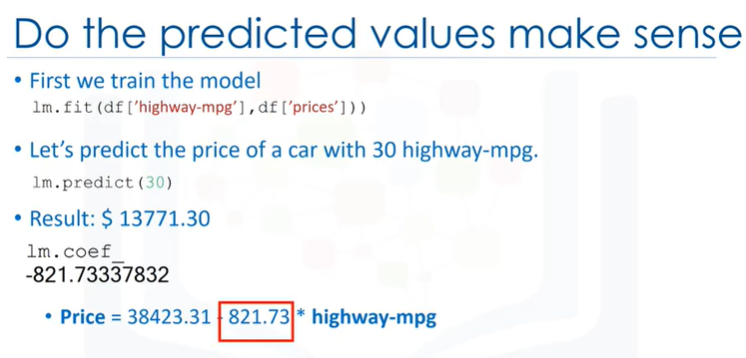

Visualizar a través de curvas, como en este caso el de regresión.

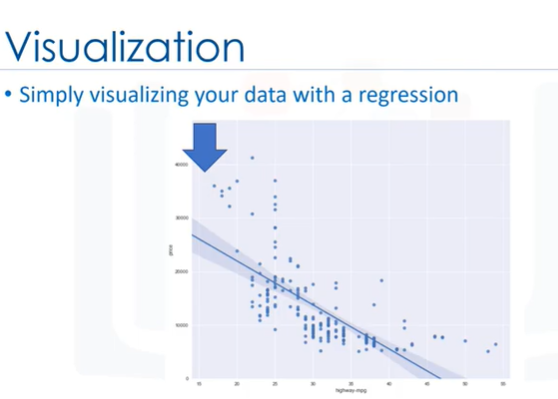

Entender el comportamiento de los residuos

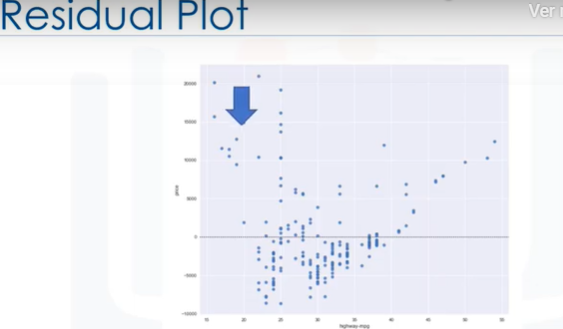

Analizar la relación de R^2, por ejemplo, el siguiente modelo tiene R^2 de 0.9226.

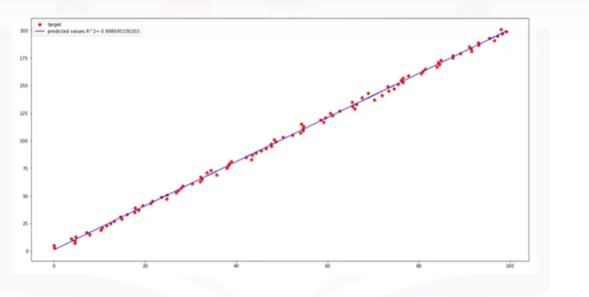

Acá el modelo tiene un R^2 de 0.61 y, a pesar de que la tendencia no es clara, aún así se puede observar cómo la información incrementa respondiendo a la variable independiente.

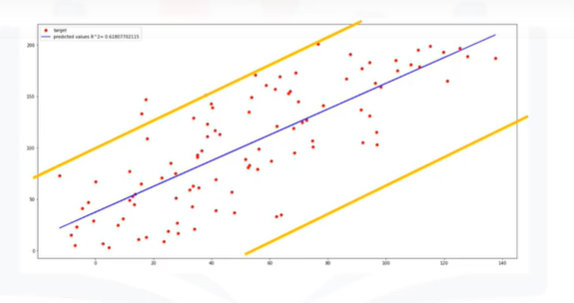

MSE en MLR y SLR

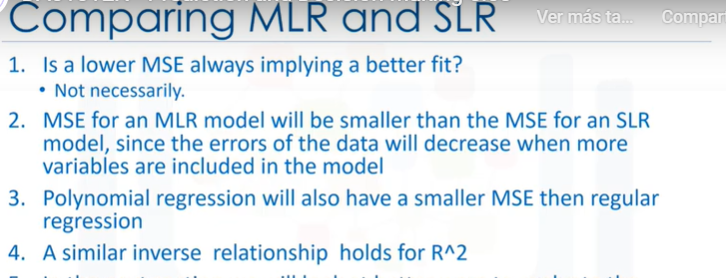

# LAB 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
DatosOriginales = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")

In [8]:
df = DatosOriginales.copy()
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

1. Linear Regression and Multiple Linear Regression

Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()
lm

LinearRegression()

In [11]:
X = df[['highway-mpg']]
Y = df['price']

In [12]:
lm.fit(X,Y)

LinearRegression()

In [13]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
lm.intercept_

38423.3058581574

In [15]:
lm.coef_

array([-821.73337832])

Question #1 a)
Create a linear regression object called "lm1".

In [16]:
lm1 = LinearRegression()
lm1

LinearRegression()

Question #1 b)
Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [17]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

Question #1 c)
Find the slope and intercept of the model.

In [18]:
lm1.coef_

array([[166.86001569]])

In [19]:
lm1.intercept_

array([-7963.33890628])

Question #1 d)
What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [20]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

Multiple Linear Regression

In [21]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [22]:
lm.fit(Z, df['price'])

LinearRegression()

In [23]:
lm.intercept_

-15806.62462632922

In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Question #2 a): 
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [25]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

Question #2 b): 
Find the coefficient of the model.

In [26]:
lm2.coef_

array([   1.49789586, -820.45434016])

2. Model Evaluation Using Visualization

In [30]:
import seaborn as sns
%matplotlib inline

Regression Plot

(0.0, 48185.61489626067)

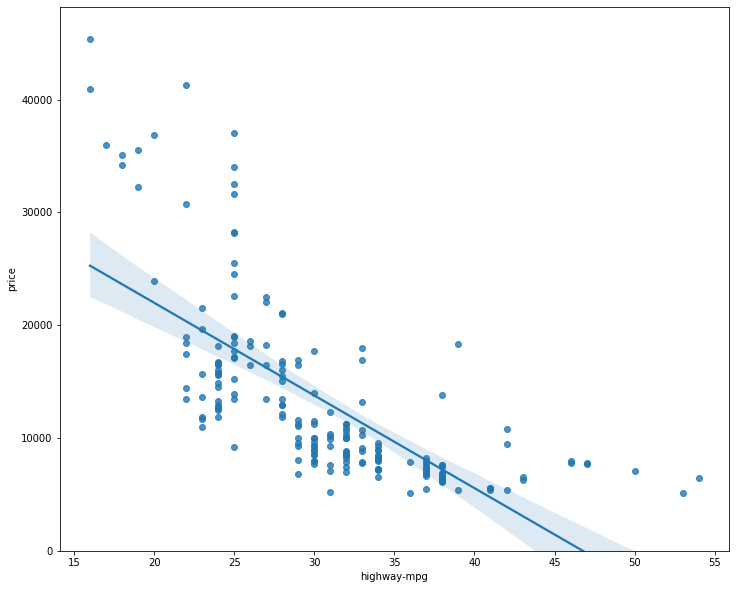

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

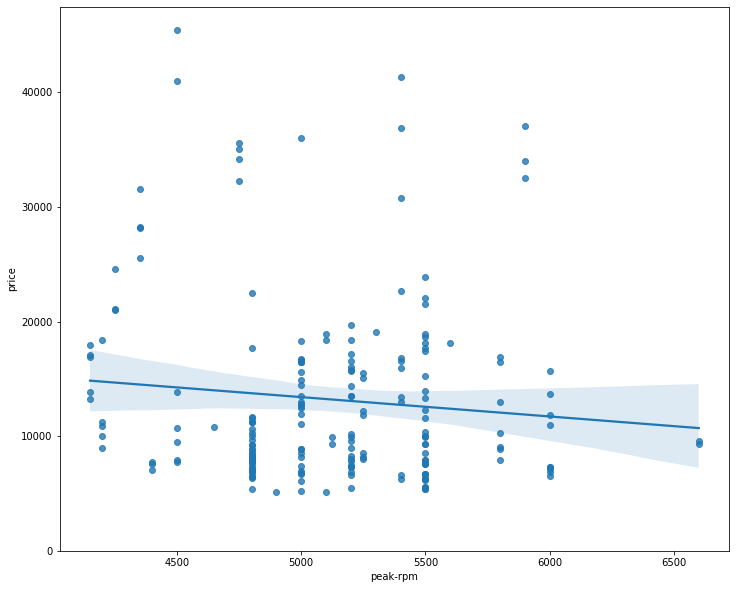

In [29]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Question #3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [31]:
df[["peak-rpm","highway-mpg","price"]].corr()

peak-rpm  highway-mpg     price
peak-rpm     1.000000    -0.058598 -0.101616
highway-mpg -0.058598     1.000000 -0.704692
price       -0.101616    -0.704692  1.000000

Residual Plot

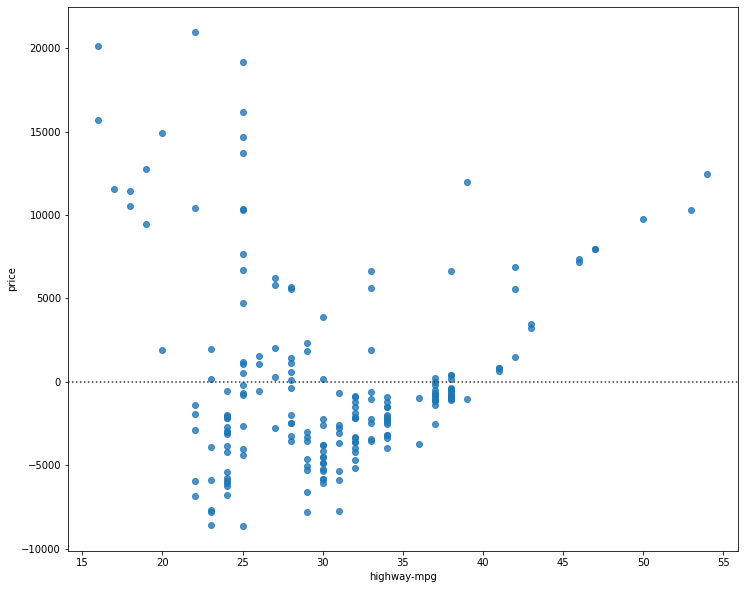

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Multiple Linear Regression

In [33]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


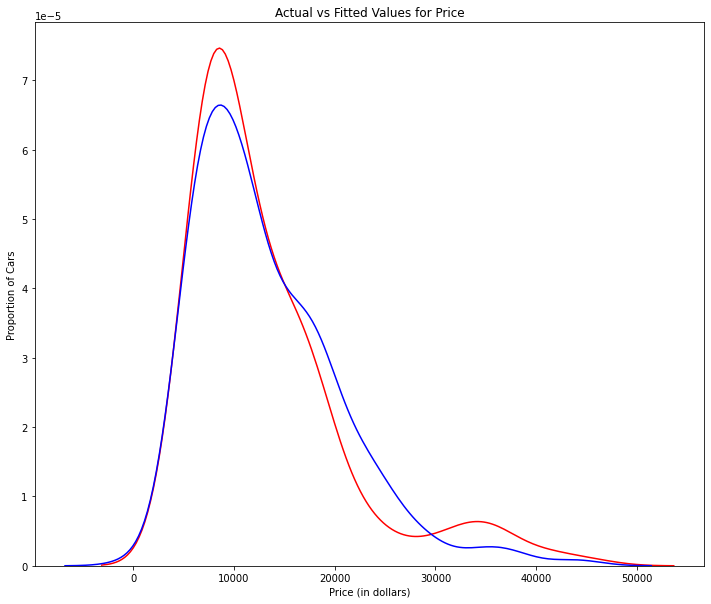

In [34]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

3. Polynomial Regression and Pipelines

In [36]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [37]:
x = df['highway-mpg']
y = df['price']

In [38]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


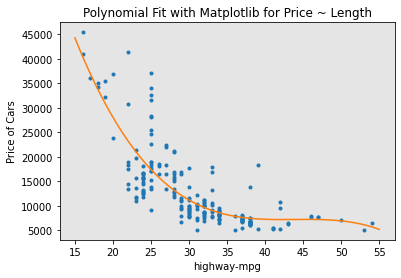

In [39]:
PlotPolly(p, x, y, 'highway-mpg')

In [40]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Question #4:
Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


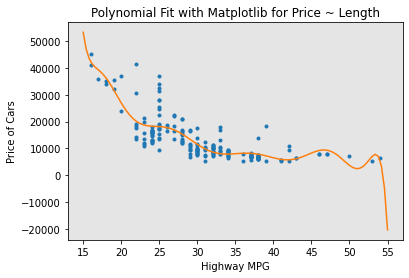

In [41]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [44]:
Z_pr=pr.fit_transform(Z)

In [45]:
Z.shape

(201, 4)

In [46]:
Z_pr.shape

(201, 15)

Pipeline

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [49]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [50]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Question #5:
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [52]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

4. Measures for In-Sample Evaluation

In [53]:
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [54]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [57]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [58]:
Y_predict_multifit = lm.predict(Z)

In [59]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [60]:
from sklearn.metrics import r2_score

In [61]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [62]:
mean_squared_error(df['price'], p(x))

20474146.426361218

5. Prediction and Decision Making

In [63]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [64]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [65]:
lm.fit(X, Y)
lm

LinearRegression()

In [66]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

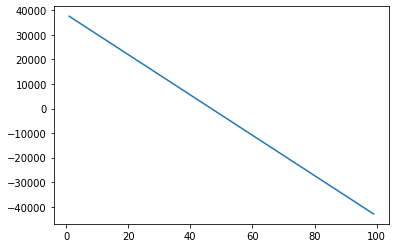

In [67]:
plt.plot(new_input, yhat)
plt.show()

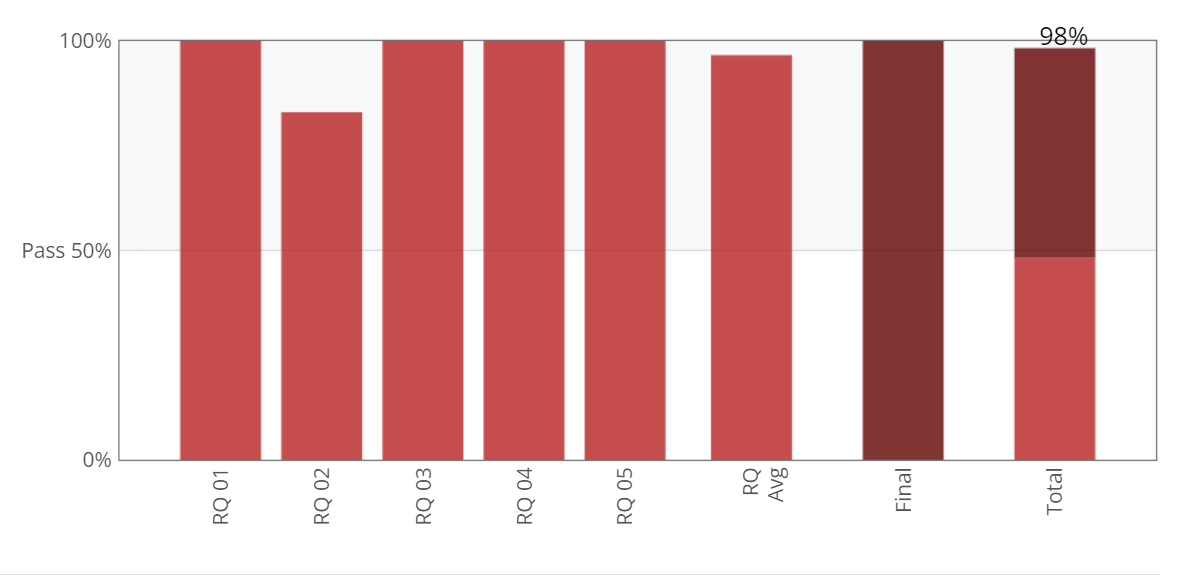